In [33]:
import numpy as np
import cv2
import matplotlib 
import pandas as pd
from matplotlib import pyplot as plt
%matplotlib inline


In [34]:
img = cv2.imread('./test_image/mkbhdtst1.jpg')
img.shape


(100, 100, 3)

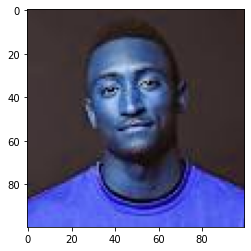

In [35]:
plt.imshow(img)

In [36]:
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
gray.shape

(100, 100)

In [37]:
gray

array([[ 51,  51,  51, ...,  41,  41,  41],
       [ 52,  51,  51, ...,  41,  41,  41],
       [ 52,  52,  51, ...,  41,  41,  41],
       ...,
       [147, 142, 142, ..., 141, 156, 128],
       [147, 144, 144, ..., 149, 161, 121],
       [146, 146, 147, ..., 152, 161, 113]], dtype=uint8)

haed cascade to mark face in image

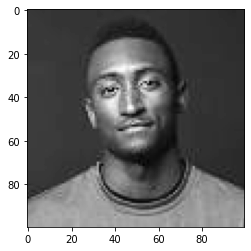

In [38]:
plt.imshow(gray, cmap='gray')

In [39]:
# face_cascade = cv2.CascadeClassifier('./model/opencv/haarcascade/haarcascade_frontalface_default.xml')
# eye_cascade = cv2.CascadeClassifier('./model/opencv/haarcascades/harcascade_eye.xml')
face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')
eye_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_eye.xml')

faces = face_cascade.detectMultiScale(gray, 1.3, 5)
faces
# returns an array of faces


array([[23, 15, 51, 51]], dtype=int32)

In [40]:
# plotting points across faces
(x,y,w,h) = faces[0]
x,y,w,h

(23, 15, 51, 51)

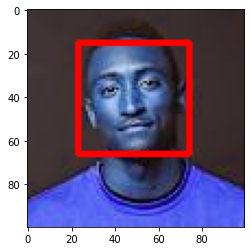

In [41]:
#plot lines across face

face_img = cv2.rectangle(img,(x,y),(x+w,y+h),(255,0,0),2)
plt.imshow(face_img)

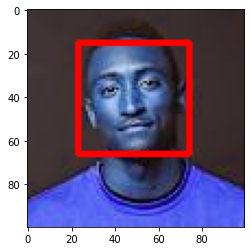

In [42]:
# cascading the eyes
# roi = region of interest
cv2.destroyAllWindows()
for (x,y,w,h) in faces:
    face_img = cv2.rectangle(img,(x,y),(x+w,y+h),(255,0,0),2)
    roi_gray = gray[y:y+h,x:x+w]
    roi_color = face_img[y:y+h,x:x+w]
    eyes = eye_cascade.detectMultiScale(roi_gray)
    for (ex,ey,ew,eh) in eyes:
        cv2.rectangle(roi_color,(ex,ey),(ex+ew,ey+eh),(0,255,0),2)
        
plt.figure()
plt.imshow(face_img, cmap='gray')
plt.show()

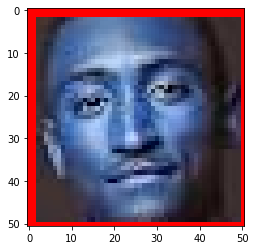

In [43]:
plt.imshow(roi_color, cmap='gray')

In [44]:
def get_cropped_image_if_2_eyes(image_path):
    img = cv2.imread(image_path)
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    faces = face_cascade.detectMultiScale(gray, 1.3, 5)
    for (x,y,w,h) in faces:
        roi_gray = gray[y:y+h, x:x+w]
        roi_color = img[y:y+h, x:x+w]
        eyes = eye_cascade.detectMultiScale(roi_gray)
        if len(eyes)>=2:
            return roi_color
        

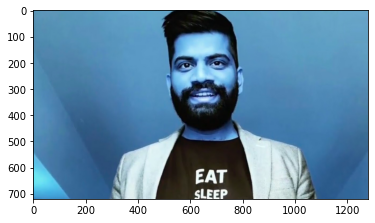

In [45]:
orignal = cv2.imread('./test_image/test3.jpg')
plt.imshow(orignal)

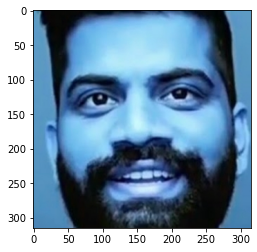

In [46]:
cropped_image = get_cropped_image_if_2_eyes('./test_image/test3.jpg')
plt.imshow(cropped_image)

In [47]:
path_to_data = "./dataset/"
path_to_cr_data = "./dataset/cropped/"

In [48]:
import os 
img_dirs = []
for entry in os.scandir(path_to_data):
    if entry.is_dir():
        img_dirs.append(entry.path)
        

In [49]:
img_dirs

['./dataset/cropped',
 './dataset/gaurav_chaudhary',
 './dataset/linus_sebastian',
 './dataset/mark_rober',
 './dataset/marques_brownlee',
 './dataset/unbox_therapy']

In [50]:
import shutil
if os.path.exists(path_to_cr_data):
    shutil.rmtree(path_to_cr_data)
os.mkdir(path_to_cr_data)

In [51]:
# cropped_image_dirs=[]
# youtuber_file_name_dict = {}

# for img_dir in img_dirs:
#     count = 1
#     youtuber_name = img_dir.split('/dataset')[-1]
#     print(youtuber_name)
#     youtuber_file_name_dict[youtuber_name] = []
    
#     for entry in os.scandir(img_dir):
#         roi_color = get_cropped_image_if_2_eyes(entry.path)
#         if roi_color is not None:
#             cropped_folder = path_to_cr_data + youtuber_name
#             os.makedirs(cropped_folder)
#             cropped_image_dirs(cropped_folder)
#             print("generating cropped images in folder:", cropped_folder)
            
#         cropped_file_name = youtuber_name + str(count) + ".png"
#         cropped_file_path = cropped_folder + "/"+ cropped_file_name
        
#         cv2.imwrite(cropped_file_path, roi_color)
#         youtuber_file_name_dict[youtuber_name].append(cropeed_file_path)
#         count += 1    
cropped_image_dirs = []
youtuber_file_names_dict = {}
for img_dir in img_dirs:
    count = 1
    youtuber_name = img_dir.split('/')[-1]
    youtuber_file_names_dict[youtuber_name] = []
    for entry in os.scandir(img_dir):
        roi_color = get_cropped_image_if_2_eyes(entry.path)
        if roi_color is not None:
            cropped_folder = path_to_cr_data + youtuber_name
            if not os.path.exists(cropped_folder):
                os.makedirs(cropped_folder)
                cropped_image_dirs.append(cropped_folder)
                print("Generating cropped images in folder: ",cropped_folder)
            cropped_file_name = youtuber_name + str(count) + ".png"
            cropped_file_path = cropped_folder + "/" + cropped_file_name
            cv2.imwrite(cropped_file_path, roi_color)
            youtuber_file_names_dict[youtuber_name].append(cropped_file_path)
            count += 1

Generating cropped images in folder:  ./dataset/cropped/gaurav_chaudhary
Generating cropped images in folder:  ./dataset/cropped/linus_sebastian
Generating cropped images in folder:  ./dataset/cropped/mark_rober
Generating cropped images in folder:  ./dataset/cropped/marques_brownlee
Generating cropped images in folder:  ./dataset/cropped/unbox_therapy


## wavelet transformation :
    EXTRACT FEATURES FROM IMAGES WHICH ARE ALRECDY CROPPED

In [52]:
# from stackoverflow
import numpy as np
import pywt
import cv2    

def w2d(img, mode='haar', level=1):
    imArray = img
    #Datatype conversions
    #convert to grayscale
    imArray = cv2.cvtColor( imArray,cv2.COLOR_RGB2GRAY )
    #convert to float
    imArray =  np.float32(imArray)   
    imArray /= 255;
    # compute coefficients 
    coeffs=pywt.wavedec2(imArray, mode, level=level)

    #Process Coefficients
    coeffs_H=list(coeffs)  
    coeffs_H[0] *= 0;  

    # reconstruction
    imArray_H=pywt.waverec2(coeffs_H, mode);
    imArray_H *= 255;
    imArray_H =  np.uint8(imArray_H)

    return imArray_H

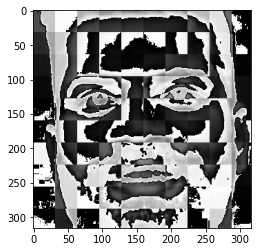

In [53]:
im_har = w2d(cropped_image,'db1',5)
plt.imshow(im_har, cmap = 'gray')


In [54]:
youtuber_file_names_dict

{'cropped': [],
 'gaurav_chaudhary': ['./dataset/cropped/gaurav_chaudhary/gaurav_chaudhary1.png',
  './dataset/cropped/gaurav_chaudhary/gaurav_chaudhary2.png',
  './dataset/cropped/gaurav_chaudhary/gaurav_chaudhary3.png',
  './dataset/cropped/gaurav_chaudhary/gaurav_chaudhary4.png',
  './dataset/cropped/gaurav_chaudhary/gaurav_chaudhary5.png',
  './dataset/cropped/gaurav_chaudhary/gaurav_chaudhary6.png',
  './dataset/cropped/gaurav_chaudhary/gaurav_chaudhary7.png',
  './dataset/cropped/gaurav_chaudhary/gaurav_chaudhary8.png',
  './dataset/cropped/gaurav_chaudhary/gaurav_chaudhary9.png',
  './dataset/cropped/gaurav_chaudhary/gaurav_chaudhary10.png',
  './dataset/cropped/gaurav_chaudhary/gaurav_chaudhary11.png',
  './dataset/cropped/gaurav_chaudhary/gaurav_chaudhary12.png',
  './dataset/cropped/gaurav_chaudhary/gaurav_chaudhary13.png',
  './dataset/cropped/gaurav_chaudhary/gaurav_chaudhary14.png',
  './dataset/cropped/gaurav_chaudhary/gaurav_chaudhary15.png',
  './dataset/cropped/gaurav_

In [55]:
class_dict = {}
count = 0
for youtuber_name in youtuber_file_names_dict.keys():
    class_dict[youtuber_name] = count
    count = count + 1
class_dict

{'cropped': 0,
 'gaurav_chaudhary': 1,
 'linus_sebastian': 2,
 'mark_rober': 3,
 'marques_brownlee': 4,
 'unbox_therapy': 5}

In [56]:
# X = []
# y = []

# # training image is path name
# for youtuber_name, training_files in youtuber_file_names_dict.items():
#     for training_image in training_files:
# #     scalled raw image
#         scalled_raw_img = cv2.resize(img, (32,32))   
#     #     wavelet transfrom imga and resized  

#         img_har = w2d(img,'db1',5)
#         scalled_img_har = cv2.resize(img_har,(32,32))
#         combined_img = np.vstack((scalled_raw_img(32*32*3,1),
#                                  scalled_img_har.reshape(32*32,1)
#         X.append(combined_img)
#         y.append(class_dict[youtuber_name])

X, y = [], []
for youtuber_name, training_files in youtuber_file_names_dict.items():
    for training_image in training_files:
        img = cv2.imread(training_image)
        scalled_raw_img = cv2.resize(img, (32, 32))
        img_har = w2d(img,'db1',5)
        scalled_img_har = cv2.resize(img_har, (32, 32))
        combined_img = np.vstack((scalled_raw_img.reshape(32*32*3,1),scalled_img_har.reshape(32*32,1)))
        X.append(combined_img)
        y.append(class_dict[youtuber_name])

In [57]:
len(X[0])

4096

In [58]:
# reshaping the image for 2d array

X = np.array(X).reshape(len(X),4096).astype(float)
X.shape

(154, 4096)

## data cleaning process done, 

Now we will train our model

usnig svm

In [59]:
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report

In [60]:
# X_train, X_test,y_train, y_test = train_test_split(X,y,random_state = 0)

# pipe = Pipeline([('scaler', StandardScaler()),('svc', SVC(kernel= 'rbf',C = 10))])
# pipe.fit(X_train,y_train)
# pipe.fit(X_test, y_test)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

pipe = Pipeline([('scaler', StandardScaler()), ('svc', SVC(kernel = 'rbf', C = 10))])
pipe.fit(X_train, y_train)
pipe.score(X_test, y_test)


0.717948717948718

In [61]:
print(classification_report(y_test, pipe.predict(X_test)))

              precision    recall  f1-score   support

           1       1.00      1.00      1.00         4
           2       0.55      0.67      0.60         9
           3       0.75      0.71      0.73        17
           4       0.75      0.86      0.80         7
           5       0.00      0.00      0.00         2

    accuracy                           0.72        39
   macro avg       0.61      0.65      0.63        39
weighted avg       0.69      0.72      0.70        39



c:\users\ayush\appdata\local\programs\python\python37\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


## grid search  tot try differ models and parameters
#     goal to come with best tined para
    

In [62]:
from sklearn import svm 
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import GridSearchCV

In [63]:
# model_params = {
#     'svm': {
#         'model': svm.SVC(gamma = 'auto', probabaility = True),
#         'params': {
#             'svc__C':[1,10,100,1000]
#             'svc__kernel' :['rbf', 'linear']
#         }
        
#     },
#     'random_forest':{
#         'model':RandomForestClassifier()
#         'params': {
#             'randomforestclassifier__n_estimators':[1,5,10]
#         }
#     },
#     'logistic_regression':{
#         'model': LogisticRegression(solver ='liblinear', multi_class = 'auto'),
#         'params':{
#             'logisticregression__C':[1,5,10]
#         } 
#     }
# 
model_params = {
    'svm': {
        'model': svm.SVC(gamma='auto',probability=True),
        'params' : {
            'svc__C': [1,10,100,1000],
            'svc__kernel': ['rbf','linear']
        }  
    },
    'random_forest': {
        'model': RandomForestClassifier(),
        'params' : {
            'randomforestclassifier__n_estimators': [1,5,10]
        }
    },
    'logistic_regression' : {
        'model': LogisticRegression(solver='liblinear',multi_class='auto'),
        'params': {
            'logisticregression__C': [1,5,10]
        }
    }
}

In [64]:
scores = []
best_estimators = {}
for algo,mp in model_params.items():
    pipe = make_pipeline(StandardScaler(), mp['model'])
#     we doing k means cross validation on k =5
    clf = GridSearchCV(pipe, mp['params'], cv=5,return_train_score=False)
    clf.fit(X_train,y_train)
    scores.append({
        'model': algo,
        'best_score': clf.best_score_,
        'best_params': clf.best_params_
    })
    best_estimators[algo] = clf.best_estimator_
    
df = pd.DataFrame(scores,columns=['model','best_score','best_params'])
df

,model,best_score,best_params
0,svm,0.739130,"{'svc__C': 1, 'svc__kernel': 'linear'}"
1,random_forest,0.669565,{'randomforestclassifier__n_estimators': 10}
2,logistic_regression,0.800000,{'logisticregression__C': 5}


In [73]:
best_estimators['svm'].score(X_test, y_test)

0.717948717948718

In [74]:
best_estimators['random_forest'].score(X_test, y_test)

0.5384615384615384

In [75]:
best_estimators['logistic_regression'].score(X_test, y_test)

0.6410256410256411

### since svm used give best accuracy we move with for deployment

In [76]:
best_clf = best_estimators['svm']

In [78]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, best_clf.predict(X_test))
cm

array([[ 4,  0,  0,  0,  0],
       [ 0,  7,  2,  0,  0],
       [ 0,  4, 12,  1,  0],
       [ 0,  1,  1,  5,  0],
       [ 0,  1,  1,  0,  0]], dtype=int64)

Text(69.0, 0.5, 'Truth')

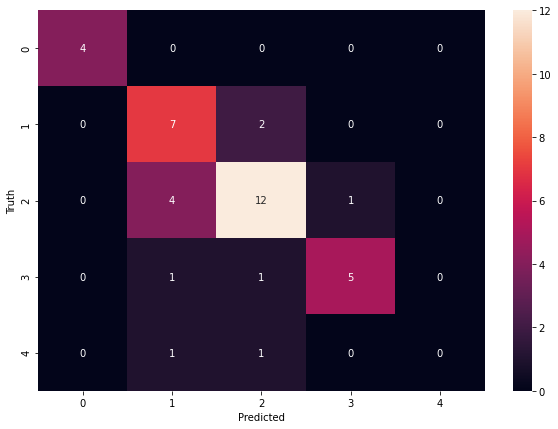

In [79]:
import seaborn as sn
plt.figure(figsize = (10,7))
sn.heatmap(cm, annot = True)
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [82]:
class_dict

{'cropped': 0,
 'gaurav_chaudhary': 1,
 'linus_sebastian': 2,
 'mark_rober': 3,
 'marques_brownlee': 4,
 'unbox_therapy': 5}

### save trained model

In [81]:
!pip install joblib
import joblib
# savee file to picjle
joblib.dump(best_clf,'saved_model.pk1')


['saved_model.pk1']

### save class dictionary

In [83]:
import json
with open("class_dictionary.json","w") as f:
    f.write(json.dumps(class_dict))